In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('train.csv')

In [7]:
df.isnull().sum()

Allied_Nations                  0
Diplomatic_Meetings_Set         0
Percent_Of_Forces_Mobilized     0
Hostile_Nations                 0
Active_Threats                  0
Inactive_Threats                0
Citizen_Fear_Index              0
Closest_Threat_Distance(km)     0
Aircraft_Carriers_Responding    0
Troops_Mobilized(thousands)     0
DEFCON_Level                    0
ID                              0
dtype: int64

In [42]:
df['DEFCON_Level'].value_counts()

2    4270
3    3910
4    1212
1     498
5     110
Name: DEFCON_Level, dtype: int64

In [11]:
df.drop(['ID'],axis=1).corr()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level
Allied_Nations,1.000000,-0.278779,0.650308,0.111896,-0.113609,-0.067496,0.647604,-0.668521,0.096352,-0.110071,0.060440
Diplomatic_Meetings_Set,-0.278779,1.000000,-0.576116,-0.036662,0.019046,0.089007,-0.030756,0.241155,-0.106499,-0.201561,-0.274835
Percent_Of_Forces_Mobilized,0.650308,-0.576116,1.000000,0.149317,-0.036675,0.054474,0.357324,-0.529314,0.166989,0.085870,0.184876
Hostile_Nations,0.111896,-0.036662,0.149317,1.000000,0.146773,0.220252,0.299244,-0.081724,-0.004865,0.025103,-0.008469
Active_Threats,-0.113609,0.019046,-0.036675,0.146773,1.000000,0.674970,-0.009510,0.034700,-0.023317,-0.084188,-0.044782
Inactive_Threats,-0.067496,0.089007,0.054474,0.220252,0.674970,1.000000,0.103296,-0.084670,-0.004199,-0.227941,-0.161675
Citizen_Fear_Index,0.647604,-0.030756,0.357324,0.299244,-0.009510,0.103296,1.000000,-0.336929,0.085540,-0.495305,-0.190940
Closest_Threat_Distance(km),-0.668521,0.241155,-0.529314,-0.081724,0.034700,-0.084670,-0.336929,1.000000,-0.008636,0.177008,-0.030033
Aircraft_Carriers_Responding,0.096352,-0.106499,0.166989,-0.004865,-0.023317,-0.004199,0.085540,-0.008636,1.000000,0.073819,0.125775
Troops_Mobilized(thousands),-0.110071,-0.201561,0.085870,0.025103,-0.084188,-0.227941,-0.495305,0.177008,0.073819,1.000000,0.450504


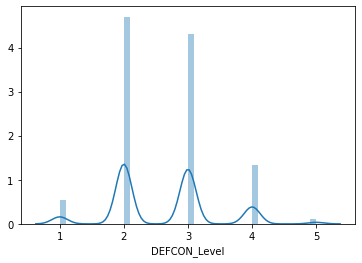

In [13]:
sns.distplot(df['DEFCON_Level'])

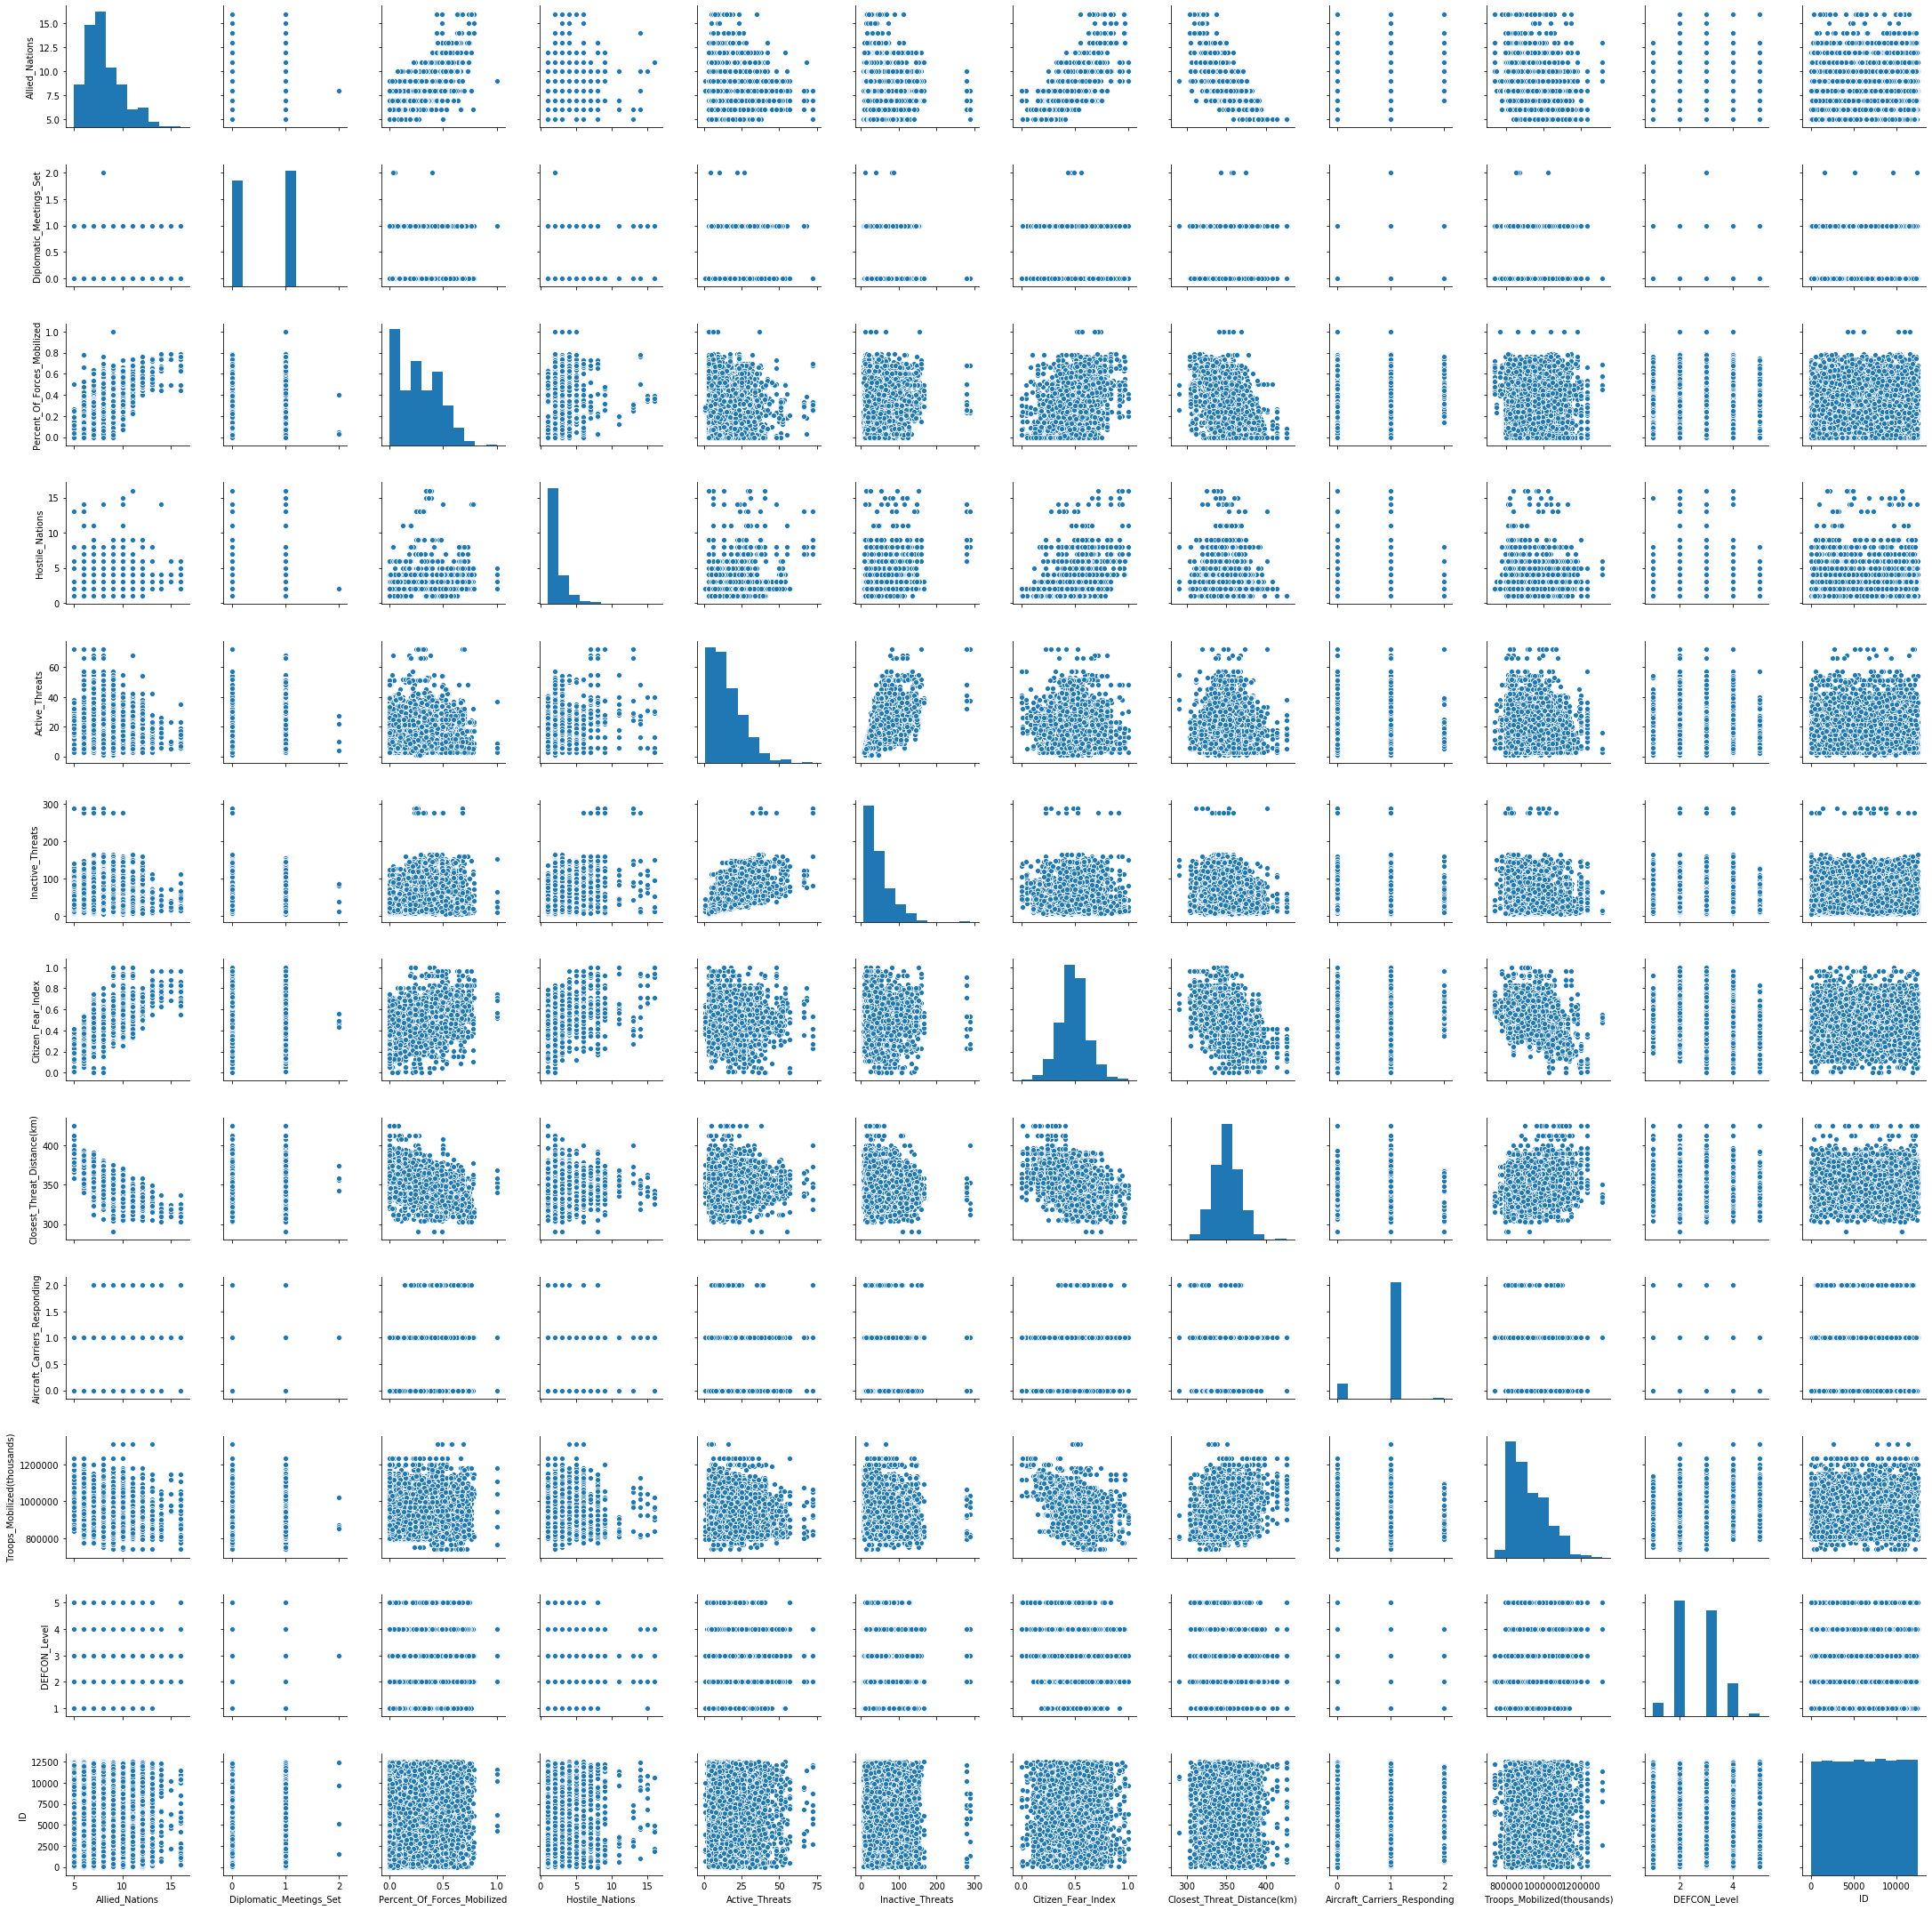

In [15]:
sns.pairplot(df)

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [97]:
from tensorflow.keras.utils import to_categorical

In [98]:
X=df.drop(['ID','DEFCON_Level'],axis=1).values
y=df['DEFCON_Level'].values

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [100]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
y_cat_train=to_categorical(y_train)

In [102]:
y_cat_test=to_categorical(y_test)

In [103]:
y_cat_train

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [104]:
y_cat_train.shape

(7000, 6)

In [105]:
model = Sequential()

model.add(Dense(16,activation='relu',input_shape=[10]))
model.add(Dropout(0.4))

model.add(Dense(32,activation='relu'))

model.add(Dense(16,activation='relu'))

model.add(Dense(6,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam')

In [106]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_21 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 102       
Total params: 1,350
Trainable params: 1,350
Non-trainable params: 0
_________________________________________________________________


In [107]:
X_train.shape

(7000, 10)

In [108]:
model.fit(X_train,y_cat_train,epochs=50,validation_data=(X_test,y_cat_test),verbose=1)

Train on 7000 samples, validate on 3000 samples
Epoch 1/50
7000/7000 [==============================] - 1s 118us/sample - loss: 1.3569 - val_loss: 1.1864
Epoch 2/50
7000/7000 [==============================] - 0s 56us/sample - loss: 1.1665 - val_loss: 1.1035
Epoch 3/50
7000/7000 [==============================] - 0s 54us/sample - loss: 1.1086 - val_loss: 1.0573
Epoch 4/50
7000/7000 [==============================] - 0s 55us/sample - loss: 1.0852 - val_loss: 1.0472
Epoch 5/50
7000/7000 [==============================] - 0s 57us/sample - loss: 1.0681 - val_loss: 1.0370
Epoch 6/50
7000/7000 [==============================] - 0s 54us/sample - loss: 1.0655 - val_loss: 1.0377
Epoch 7/50
7000/7000 [==============================] - 0s 56us/sample - loss: 1.0570 - val_loss: 1.0262
Epoch 8/50
7000/7000 [==============================] - 0s 59us/sample - loss: 1.0479 - val_loss: 1.0245
Epoch 9/50
7000/7000 [==============================] - 0s 57us/sample - loss: 1.0503 - val_loss: 1.0235
Epoch 

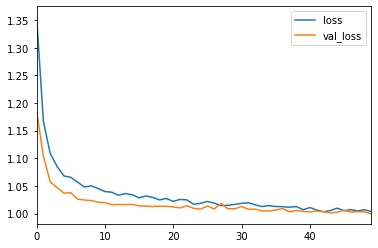

In [109]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [110]:
predictions = model.predict_classes(X_test)

In [111]:
from sklearn.metrics import classification_report,confusion_matrix

In [112]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       151
           2       0.65      0.69      0.67      1277
           3       0.50      0.69      0.58      1182
           4       0.64      0.03      0.05       354
           5       0.00      0.00      0.00        36

    accuracy                           0.57      3000
   macro avg       0.36      0.28      0.26      3000
weighted avg       0.55      0.57      0.52      3000



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [113]:
print(confusion_matrix(predictions,y_test))

[[  0   0   0   0   0]
 [ 89 879 362  25   2]
 [ 62 398 816 320  33]
 [  0   0   4   9   1]
 [  0   0   0   0   0]]


## Test

In [114]:
test = pd.read_csv("test.csv")

In [115]:
test

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),ID
0,8,0,0.52,2,19.0,52.0,0.376652,319.06,1,976800.0,1
1,9,0,0.44,2,6.0,12.0,0.254772,351.92,1,1082400.0,10
2,8,0,0.44,3,7.0,18.0,0.472100,349.80,1,924000.0,14
3,10,0,0.39,2,3.0,13.0,0.478708,343.44,1,1003200.0,17
4,9,0,0.44,2,6.0,14.0,0.561674,346.62,1,924000.0,21
...,...,...,...,...,...,...,...,...,...,...,...
2495,8,1,0.27,3,5.0,77.0,0.552863,338.14,1,827200.0,12484
2496,7,1,0.03,3,7.0,15.0,0.588106,363.58,1,827200.0,12487
2497,10,1,0.25,3,33.0,151.0,0.626285,334.96,1,809600.0,12488
2498,10,0,0.42,2,5.0,12.0,0.507342,336.02,0,950400.0,12491


In [119]:
X=test.drop(['ID'],axis=1).values
X=scaler.transform(X)

In [120]:
predictions = model.predict_classes(X)

In [130]:
predictions=pd.DataFrame(predictions)
predictions.columns = ['DEFCON_Level']

In [132]:
test=pd.concat([test,predictions],axis=1)

In [135]:
test[['ID','DEFCON_Level']].to_csv('defcon1.csv',index=False)